In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
accs = pd.melt(pd.read_csv("ismirDataFinal.csv"), id_vars=['model'], var_name='piece', value_name='tree accuracy')

In [3]:
modeldict = {
    'RandomBaseline': 'random baseline',
    'HarmonyModel': 'harmony',
    'TransposedHarmonyModel': 'transp. harmony',
    'PebbleModel': 'simple rhythm',
    'HarmonyPebbleModel': 'harmony & simple rhythm',
    'TransposedHarmonyPebbleModel': 'transp. harmony & simple rhythm',
    'RhythmModel': 'rhythm',
    'HarmonyRhythmModel': 'harmony & rhythm',
    'TransposedHarmonyRhythmModel': 'transp. harmony & rhythm'
}

accs.model = accs.model.map(modeldict)

accs.head()

,model,piece,tree accuracy
0,random baseline,1,0.333333
1,harmony,1,0.250000
2,transp. harmony,1,0.166667
3,simple rhythm,1,0.583333
4,harmony & simple rhythm,1,0.750000


In [4]:
means = accs.groupby('model')['tree accuracy'].mean()
means

model
harmony                            0.456576
harmony & rhythm                   0.619184
harmony & simple rhythm            0.612401
random baseline                    0.228506
rhythm                             0.567398
simple rhythm                      0.572701
transp. harmony                    0.462501
transp. harmony & rhythm           0.633077
transp. harmony & simple rhythm    0.621904
Name: tree accuracy, dtype: float64

# Visualizations

/Users/daniel/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


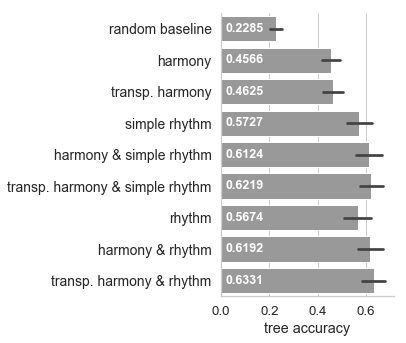

In [5]:
models = accs.model.unique()

sns.set(style='whitegrid', font_scale=1.2)
g = sns.catplot(data=accs, y='model', x='tree accuracy', kind='bar', color='#999999', aspect=1.2)

for tick,m in zip(range(len(models)), models):
    g.ax.text(0.02, tick, round(means[m], 4), verticalalignment='center', size=12.5, color='w', weight='semibold')

plt.ylabel("")
plt.yticks(fontsize=14)
plt.savefig('accs.svg')

In [6]:
ratios = pd.read_csv('leftSplitProportions.csv', names=['ratio', 'count'])
ratios.ratio = ratios.ratio.map(lambda m: r'$\frac{' + m.replace(' % ', '}{') + r'}$')
ratios.head()

,ratio,count
0,$\frac{1}{2}$,927
1,$\frac{2}{3}$,170
2,$\frac{3}{4}$,99
3,$\frac{1}{3}$,76
4,$\frac{4}{5}$,51


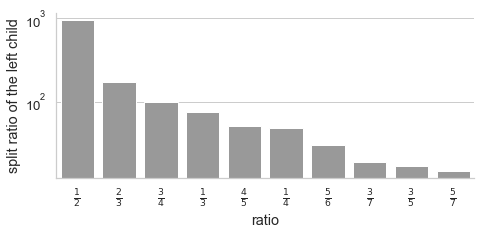

In [7]:
g = sns.catplot(data=ratios.head(10), x='ratio', y='count', color='#999999', kind='bar', log=True, height=3.5, aspect=2)
#g.set_yscale('log')
plt.ylabel("split ratio of the left child")
matplotlib.rc('xtick', labelsize=20)
plt.savefig('ratios.svg')
plt.show()

In [8]:
rules = pd.read_csv('harmonyRuleCounts.csv', names=['harmony rewrite rule', 'count'], sep=';')
rules['harmony rewrite rule'] = rules['harmony rewrite rule']\
    .map(lambda string: string[1:-1]
         .replace('[0]^,[0]^,[0]^', 'C,C,C')
         .replace(',', r'$\longrightarrow$', 1)
         .replace(',', r'   ')
         .replace('%',r'$\emptyset$')
         .replace('[0]', r'C')
         .replace('[1]', r'D$\flat$')
         .replace('[2]', r'D')
         .replace('[3]', r'E$\flat$')
         .replace('[4]', r'E')
         .replace('[5]', r'F')
         .replace('[6]', r'G$\flat$')
         .replace('[7]', r'G')
         .replace('[8]', r'A$\flat$')
         .replace('[9]', r'A')
         .replace('[10]', r'B$\flat$')
         .replace('[11]', r'B')
        )
rules.head()

,harmony rewrite rule,count
0,Cm7$\longrightarrow$Cm7 Cm7,115
1,G7$\longrightarrow$Dm7 G7,84
2,C^7$\longrightarrow$C^7 C^7,65
3,C6$\longrightarrow$C6 C6,44
4,C^7$\longrightarrow$G7 C^7,42


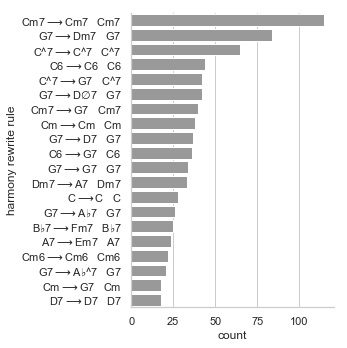

In [9]:
sns.set(style='whitegrid')
sns.catplot(data=rules.head(20), y='harmony rewrite rule', x='count', color='#999999', kind='bar')
plt.savefig('rules.svg')

# Bootstrap tests

In [11]:
def bootstrap_test(higher, lower, n=100000):
    xs = higher
    ys = lower
    m = np.mean(xs) - np.mean(ys)
    zs = np.concatenate((xs,ys))
    boots = np.random.choice(ys, size=(n,len(zs)))
    return np.sum(np.mean(boots[:,0:len(xs)], 1) - np.mean(boots[:,len(xs)+1:], 1) > m)

def bootstrap_pvalue(higher, lower, n=100000):
    return bootstrap_test(higher, lower, n=100000) / n

def bootstrap_test_models(model1, model2, n):
    return bootstrap_test(
        accs[accs.model == model1]['tree accuracy'].values,
        accs[accs.model == model2]['tree accuracy'].values,
        n
    )

In [12]:
n = 100000

for model1 in models:
    for model2 in models:
        b = bootstrap_test_models(model1, model2, n)
        if b/n < 0.1:
            print(model1)
            print(model2)
            print(b)
            print(b/n)
            print()

harmony
random baseline
0
0.0

transp. harmony
random baseline
0
0.0

simple rhythm
random baseline
0
0.0

simple rhythm
harmony
3
3e-05

simple rhythm
transp. harmony
18
0.00018

harmony & simple rhythm
random baseline
0
0.0

harmony & simple rhythm
harmony
0
0.0

harmony & simple rhythm
transp. harmony
0
0.0

transp. harmony & simple rhythm
random baseline
0
0.0

transp. harmony & simple rhythm
harmony
0
0.0

transp. harmony & simple rhythm
transp. harmony
0
0.0

transp. harmony & simple rhythm
rhythm
8636
0.08636

rhythm
random baseline
0
0.0

rhythm
harmony
4
4e-05

rhythm
transp. harmony
34
0.00034

harmony & rhythm
random baseline
0
0.0

harmony & rhythm
harmony
0
0.0

harmony & rhythm
transp. harmony
0
0.0

harmony & rhythm
rhythm
9637
0.09637

transp. harmony & rhythm
random baseline
0
0.0

transp. harmony & rhythm
harmony
0
0.0

transp. harmony & rhythm
transp. harmony
0
0.0

transp. harmony & rhythm
simple rhythm
6115
0.06115

transp. harmony & rhythm
rhythm
5032
0.05032

